In [1]:
import matplotlib.pyplot as plt
from PIL import Image


def latex_to_image(latex_str, filename="output.png"):
    """
    Renders a LaTeX expression to an image with a white background.

    Args:
    latex_str (str): The LaTeX string to render.
    filename (str): The filename where the image will be saved.
    """
    # Configure Matplotlib: use white background and remove axes
    plt.rcParams.update(
        {
            "text.usetex": True,
            "text.latex.preamble": r"\usepackage{amsmath}",
            "axes.facecolor": "white",
            "axes.edgecolor": "white",
            "axes.linewidth": 0,
            "xtick.bottom": False,
            "xtick.top": False,
            "ytick.left": False,
            "ytick.right": False,
            "xtick.labelbottom": False,
            "xtick.labeltop": False,
            "ytick.labelleft": False,
            "ytick.labelright": False,
        }
    )
    plt.figure(figsize=(2, 1))
    plt.text(
        0, 0, f"${latex_str}$", fontsize=40, ha="center", va="center", color="white"
    )
    plt.axis("off")
    plt.gca().set_axis_off()
    plt.subplots_adjust(top=1.5, bottom=0, right=0.5, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    # Plot color is white
    plt.gca().set_facecolor("white")

    # Save the image
    plt.savefig(filename, bbox_inches="tight", pad_inches=0, dpi=300)
    plt.close()

    # Open the image and invert the colors, then save it

    img = Image.open(filename)
    img = img.convert("L")
    img = img.point(lambda p: 255 - p)
    img.save(filename)


# Test
latex_to_image(r"\frac{1}{2} \cdot \frac{3}{4} = \frac{3}{8}", "output.png")

In [2]:
# Generate arbitrary LaTeX strings

# Singletons
numbers = [str(i) for i in range(100)]
# Alphabet
alphabet = [chr(i) for i in range(65, 91)] + [chr(i) for i in range(97, 123)]
# Greek alphabet LaTeX symbols (with \)
greek_lower = [
    "\\alpha",
    "\\beta",
    "\\gamma",
    "\\delta",
    "\\epsilon",
    "\\zeta",
    "\\eta",
    "\\theta",
    "\\iota",
    "\\kappa",
    "\\lambda",
    "\\mu",
    "\\nu",
    "\\xi",
    "\\omicron",
    "\\pi",
    "\\rho",
    "\\sigma",
    "\\tau",
    "\\upsilon",
    "\\phi",
    "\\chi",
    "\\psi",
    "\\omega",
]

greek_lower = ["{" + ch + "}" for ch in greek_lower]

special_singleton = [
    "{\\infty}",
    "{\\emptyset}",
]

# Two element operators
two_op = {
    "#+#": 1,
    "#-#": 1,
    "#\\cdot #": 1,
    "#\\times #": 1,
    "##": 4,
    "#/#": 2,
    "\\frac{#}{#}": 3,
    "{#}^{#}": 3,
    "{#}_{#}": 3,
}

# One element operators
one_op = {
    "-#": 2,
    "\\sum_{i=0}^{n}#": 0.2,
    "\\sum_{n=1}^{\\infty}#": 0.2,
    "\\int_{-\\infty}^{\\infty}#": 0.2,
    "\\int_{0}^{1}#": 0.2,
    "\\sqrt{#}": 1,
    "\\sin{#}": 1,
    "\\cos{#}": 1,
    "\\tan{#}": 1,
    "\\sec{#}": 1,
    "\\csc{#}": 1,
    "\\cot{#}": 1,
}

# Three element operators
three_op = {"\\int_{#}^{#}#": 3, "\\sum_{#}^{#}#": 2, "###": 4}

singletons = numbers + alphabet + greek_lower + special_singleton
one_ops = one_op
two_ops = two_op
three_ops = three_op

In [3]:
# Construct a random LaTeX expression
import random


def sample_from_dict(d):
    # Weights are not normalized
    total = sum(d.values())
    rand = random.random() * total
    for k, v in d.items():
        rand -= v
        if rand <= 0:
            return k
    return k


# Methodology: Start with a #. Now until it has no more #, replace the first # with an expresson. Expression is singleton with probablity 0.5, one_op with probability 0.3, two_op with probability 0.1, three_op with probability 0.1
def generate_expression():
    expression = "#"
    while "#" in expression:
        rand = random.random()
        expressions = [
            random.choice(singletons),
            sample_from_dict(one_ops),
            sample_from_dict(two_ops),
            sample_from_dict(three_ops),
        ]

        if rand < 0.6:
            expression = expression.replace("#", expressions[0], 1)
        elif rand < 0.7:
            expression = expression.replace("#", expressions[1], 1)
        elif rand < 0.95:
            expression = expression.replace("#", expressions[2], 1)
        else:
            expression = expression.replace("#", expressions[3], 1)
    return expression


# expression = ""
# for i in range(10):
#     while len(expression) < 400:
#         expression = generate_expression()
#     print("$" + expression + "$")
#     expression = ""

100%|██████████| 48000/48000 [00:11<00:00, 4209.55it/s] 


Error in callback <function _draw_all_if_interactive at 0x1217ebe20> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'${\\\\omicron}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpkfb0sldg cfa1d053ece6b1dae2043724ccd31142.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./cfa1d053ece6b1dae2043724ccd31142.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file cfa1d053ece6b1dae2043724ccd31142.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <40> not available
(Font)              size <24.88> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <27.99988> not available
(Font)              size <24.88> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.

! Undefined control sequence.
l.29 {\sffamily ${\omicron
                          }$}%
No pages of output.
Transcript written on tmpkfb0sldg/cfa1d053ece6b1dae2043724ccd31142.log.




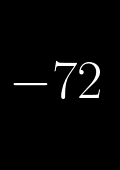

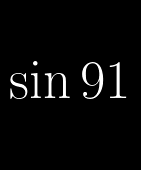

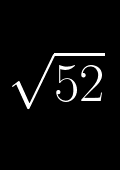

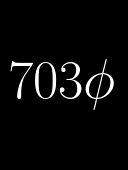

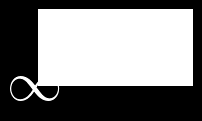

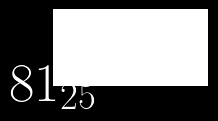

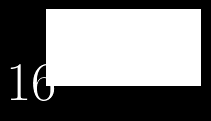

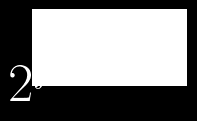

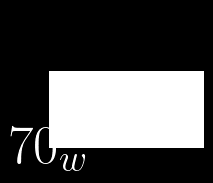

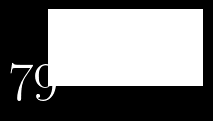

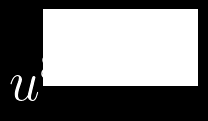

RuntimeError: latex was not able to process the following string:
b'${\\\\omicron}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpmu84b4zg cfa1d053ece6b1dae2043724ccd31142.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./cfa1d053ece6b1dae2043724ccd31142.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file cfa1d053ece6b1dae2043724ccd31142.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <40> not available
(Font)              size <24.88> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <27.99988> not available
(Font)              size <24.88> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.

! Undefined control sequence.
l.29 {\sffamily ${\omicron
                          }$}%
No pages of output.
Transcript written on tmpmu84b4zg/cfa1d053ece6b1dae2043724ccd31142.log.




<Figure size 200x100 with 2 Axes>

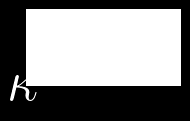

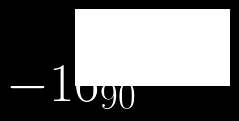

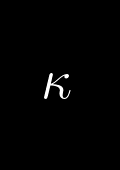

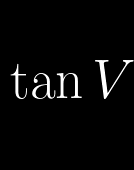

/var/folders/b_/lzmcr_wj73v_mycq99dq63nw0000gn/T/ipykernel_78377/197120275.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2, 1))
/var/folders/b_/lzmcr_wj73v_mycq99dq63nw0000gn/T/ipykernel_78377/197120275.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2, 1))
/var/folders/b_/lzmcr_wj73v_mycq99dq63nw0000gn/T/ipykernel_78377/197120275.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created

In [4]:
f = open("dataset/latex.txt", "w")

# Wrapper for latex_to_image which makes it asynchonous
import asyncio
import concurrent.futures
from tqdm import tqdm


def latex_to_image_async(latex_str, filename="output.png"):
    loop = asyncio.get_event_loop()
    loop.run_in_executor(None, latex_to_image, latex_str, filename)


def gen_exp_and_save(min_len, max_len, i):
    expression = ""
    while len(expression) < min_len or len(expression) >= max_len:
        expression = generate_expression()
    # latex_to_image(expression, filename=f"dataset/{i}.png")
    latex_to_image_async(expression, filename=f"dataset/{i}.png")
    f.write(expression + "\n")


min_length = 1
for i in tqdm(range(48000)):
    success = False
    while not success:
        try:
            gen_exp_and_save(min_length, min_length + 5, i)
            success = True
        except:
            pass

    # If i is multiple of 1000, save f
    if i % 1000 == 0:
        f.close()
        f = open("dataset/latex.txt", "a")

    # If i is multiple of 8000, increase min_length
    if i % 8000 == 0:
        min_length += 5

f.close()